**Importing the Dataset**

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

In [3]:
X

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


In [4]:
y

,symboling
0,3
1,3
2,1
3,2
4,2
...,...
200,-1
201,-1
202,-1
203,-1


**Concatenating the Dataset**

In [5]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [7]:
data = pd.concat([X, y], axis = 1)
data

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


**Checking for NaN Values**

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64


**Dropping categorical columns**

In [9]:
data.drop(columns = ['fuel-system', 'engine-location', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make', 'engine-type'], inplace = True)
data

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,2548,48.8,64.1,168.8,88.6,2.0,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,2548,48.8,64.1,168.8,88.6,2.0,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,152,6,2823,52.4,65.5,171.2,94.5,2.0,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,109,4,2337,54.3,66.2,176.6,99.8,4.0,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,136,5,2824,54.3,66.4,176.6,99.4,4.0,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,141,4,2952,55.5,68.9,188.8,109.1,4.0,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,141,4,3049,55.5,68.8,188.8,109.1,4.0,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,173,6,3012,55.5,68.9,188.8,109.1,4.0,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,145,6,3217,55.5,68.9,188.8,109.1,4.0,95.0,-1


**Getting all the columns with null values**

In [10]:
null_columns = []

for x in data.columns:
    if data[x].isnull().any():
        null_columns.append(x)

null_columns

['price',
 'peak-rpm',
 'horsepower',
 'stroke',
 'bore',
 'num-of-doors',
 'normalized-losses']

**Mean imputation**

In [11]:
for x in null_columns:
  data[x] = data[x].fillna(data[x].mean())

data

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,2548,48.8,64.1,168.8,88.6,2.0,122.0,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,2548,48.8,64.1,168.8,88.6,2.0,122.0,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,152,6,2823,52.4,65.5,171.2,94.5,2.0,122.0,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,109,4,2337,54.3,66.2,176.6,99.8,4.0,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,136,5,2824,54.3,66.4,176.6,99.4,4.0,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,141,4,2952,55.5,68.9,188.8,109.1,4.0,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,141,4,3049,55.5,68.8,188.8,109.1,4.0,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,173,6,3012,55.5,68.9,188.8,109.1,4.0,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,145,6,3217,55.5,68.9,188.8,109.1,4.0,95.0,-1


**Checking again if there is null**

In [12]:
missing_values = data.isnull().sum()
print(missing_values)

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
engine-size          0
num-of-cylinders     0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
num-of-doors         0
normalized-losses    0
symboling            0
dtype: int64



---


**Correlation of the Columns using heatmap**

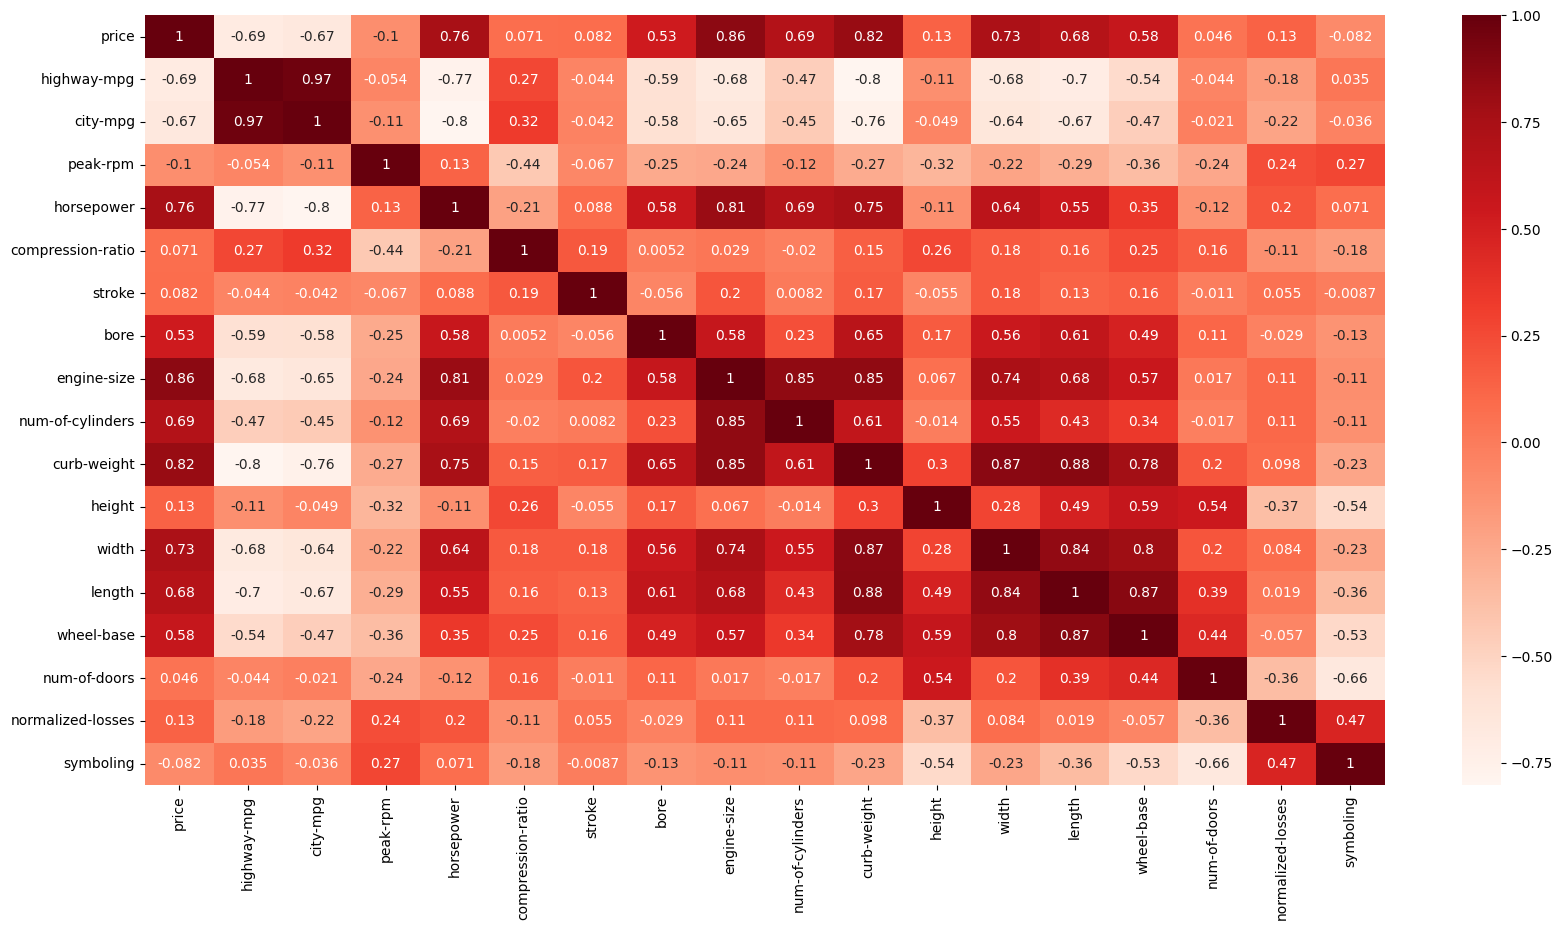

In [13]:
plt.figure(figsize = (20,10))
ax = sns.heatmap(data.corr(), annot = True, cmap = 'Reds')

**Observing our heatmap, we can see good correlations or good relevance of 2 columns, we can use those columns for our predictions**


---



**Pairplotting the Dataframe**

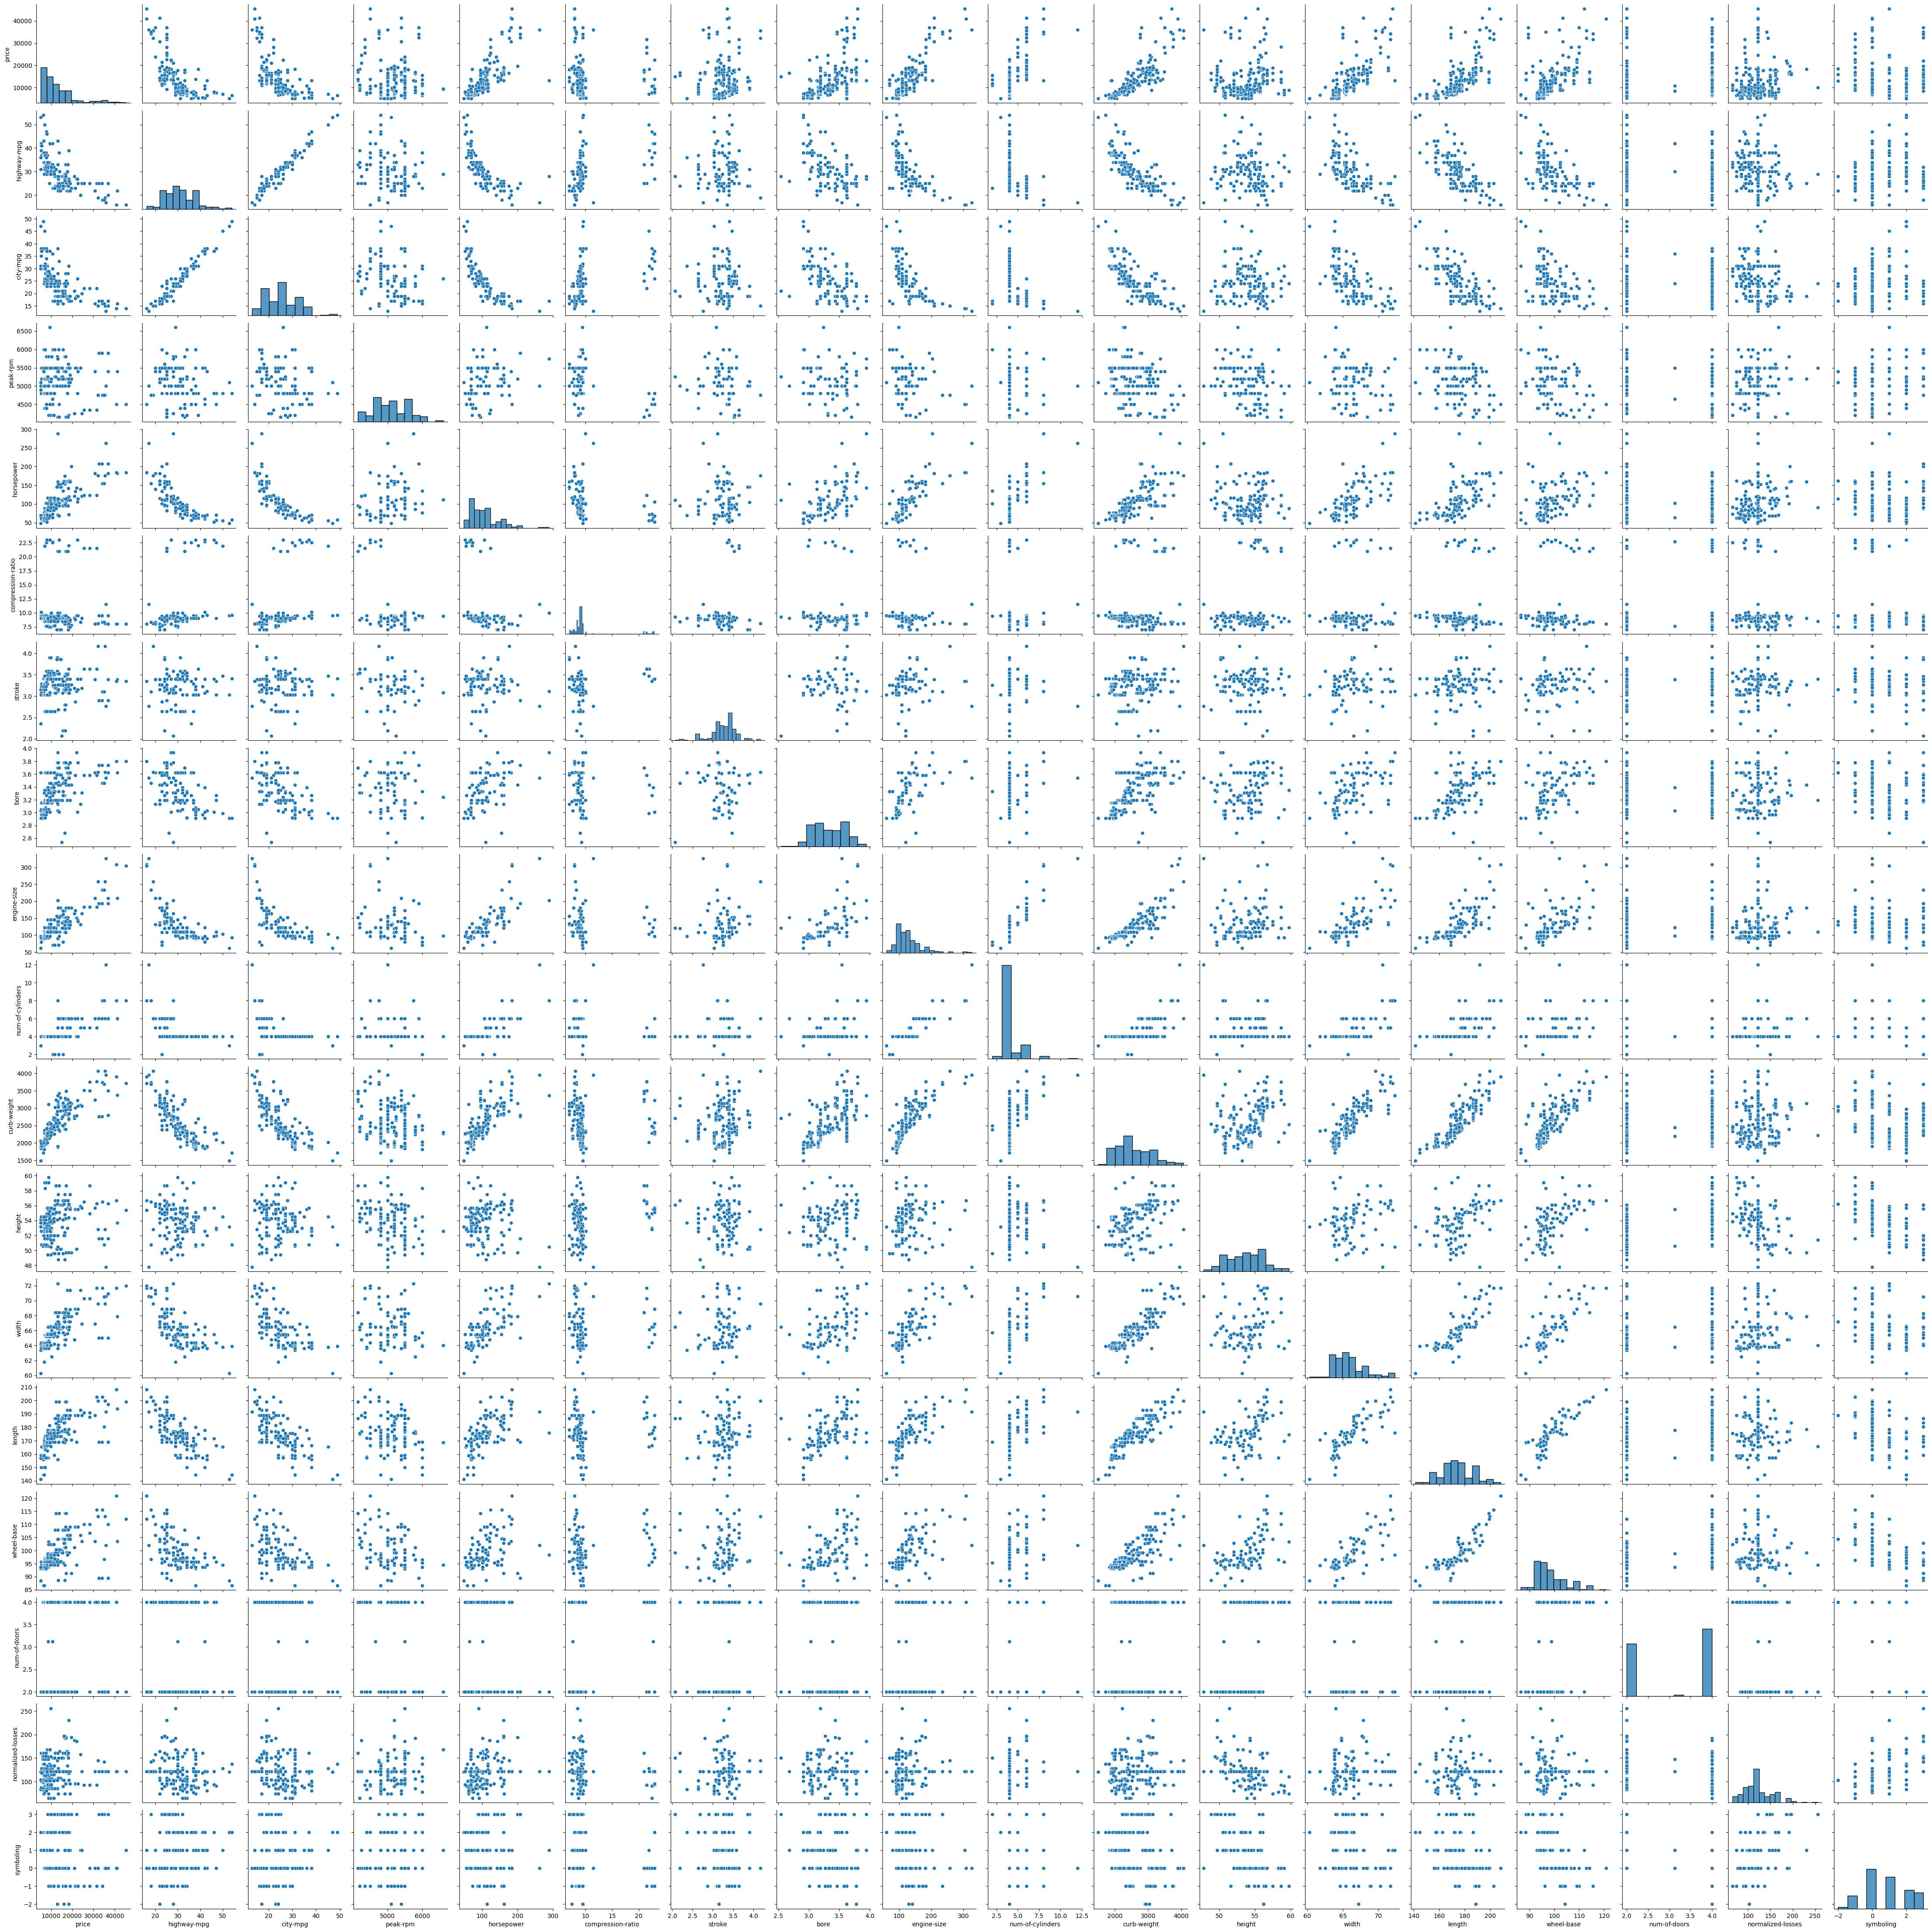

In [14]:
sns.pairplot(data)

**Based on our correlation on heatmap, lets choose highway-mpg with city mpg and prize with engine size since they have a good correlation**

<Axes: xlabel='highway-mpg', ylabel='city-mpg'>

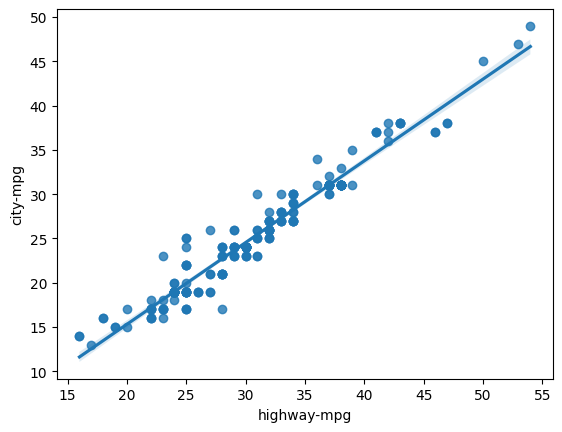

In [15]:
sns.regplot(x = data['highway-mpg'], y = data['city-mpg'])

In [16]:
data['highway-mpg'].corr(data['city-mpg'])

0.9713370423425061

<Axes: xlabel='price', ylabel='engine-size'>

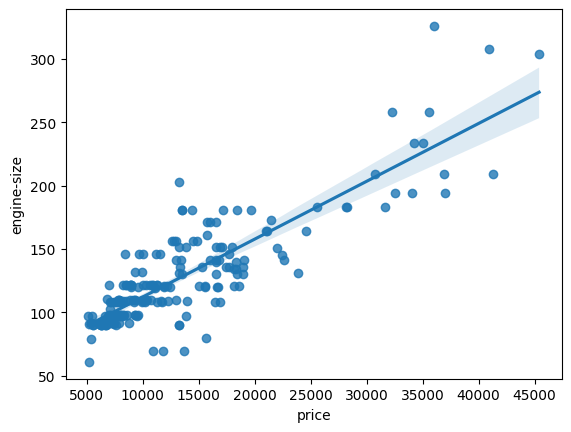

In [17]:
sns.regplot(x = data['price'], y = data['engine-size'])

In [18]:
data['price'].corr(data['engine-size'])

0.8617522436859719

**The correlation coefficient between city-mpg and highwat-mpg is 0.97**

**The correlation coefficient between price and engine-size is 0.86**

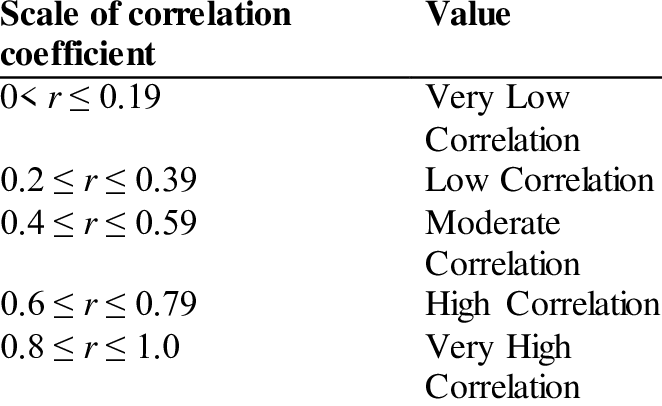

**Both of them are above 0.8 which mean that if one of them goes up, the other will also go up in otherwords, they are directly proportional to each other.**



---

**We can also try with negative correlation**

**We can plot high-way mpg and curb-weight to see their correlation**

<Axes: xlabel='highway-mpg', ylabel='curb-weight'>

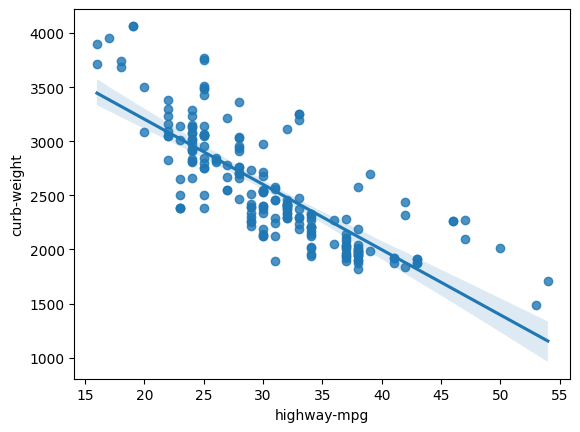

In [19]:
sns.regplot(x = data['highway-mpg'], y = data['curb-weight'])

**Observing our plot, we can see that our line is going downwards. Both of our variables are moving in opposite direction. If our graph moves in opposite direction, it means that as the other value of the variable 1 increase, the value of variable 2 decreases**

**In this plot, as the value of curb-weight decreases, the higher highway-mpg we gain**



---


**We can also graph the city-mpg with horsepower**

<Axes: xlabel='highway-mpg', ylabel='horsepower'>

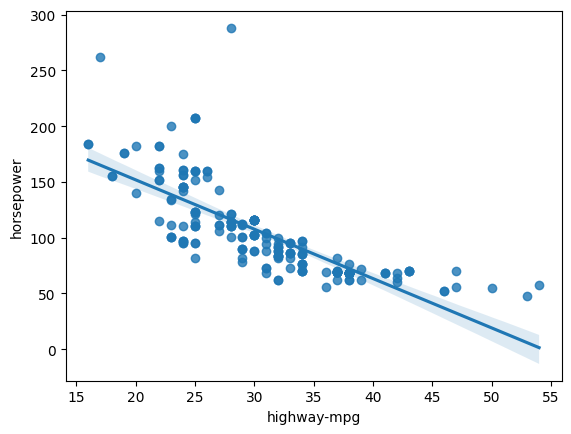

In [20]:
sns.regplot(x = data['highway-mpg'], y = data['horsepower'])

**Same thing can also be observed on the graph in terms of horsepower and highway-mpg. The lower our horsepower, the higher highway-mpg we have>**